In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [58]:
%matplotlib inline

# 1. Calendar data analysis

In [5]:
# path = Path().resolve() / 'data' / 'calendar.csv'
# path = Path.cwd() / 'data' / 'calendar.csv'

base_path = os.getcwd()
path1 = os.path.join(base_path, 'data/calendar.csv')

In [24]:
calendar = pd.read_csv(path)
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1610503,2020-03-17,f,$505.00,$505.00,1,1125
1,782604,2020-03-17,f,$737.00,$737.00,27,365
2,782604,2020-03-18,f,$737.00,$737.00,27,365
3,782604,2020-03-19,f,$737.00,$737.00,27,365
4,782604,2020-03-20,f,$737.00,$737.00,27,365


In [25]:
# print(calendar['price'].values[0])
# print(calendar['price'].to_numpy()[0]) # recommend
price = calendar['price'].str.replace(r"[$,]", "", regex=True).astype('float32')
price.head()

0    505.0
1    737.0
2    737.0
3    737.0
4    737.0
Name: price, dtype: float32

In [26]:
calendar['price'] = price

In [27]:
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(r"[$,]", "", regex=True).astype('float32')

In [28]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1610503,2020-03-17,f,505.0,505.0,1,1125
1,782604,2020-03-17,f,737.0,737.0,27,365
2,782604,2020-03-18,f,737.0,737.0,27,365
3,782604,2020-03-19,f,737.0,737.0,27,365
4,782604,2020-03-20,f,737.0,737.0,27,365


In [32]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date'].head()

0   2020-03-17
1   2020-03-17
2   2020-03-18
3   2020-03-19
4   2020-03-20
Name: date, dtype: datetime64[ns]

In [33]:
calendar['weekday'] = calendar['date'].dt.weekday
calendar['month'] = calendar['date'].dt.month

In [38]:
# calendar['weekday'].head()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,month
0,1610503,2020-03-17,f,505.0,505.0,1,1125,1,3
1,782604,2020-03-17,f,737.0,737.0,27,365,1,3
2,782604,2020-03-18,f,737.0,737.0,27,365,2,3
3,782604,2020-03-19,f,737.0,737.0,27,365,3,3
4,782604,2020-03-20,f,737.0,737.0,27,365,4,3


In [41]:
month_price = calendar.groupby("month")['price'].mean()
month_price

month
1     783.800781
2     760.528381
3     721.129883
4     714.120850
5     720.679382
6     724.483704
7     737.439026
8     745.320740
9     750.109009
10    758.972656
11    755.849487
12    769.295410
Name: price, dtype: float32

In [42]:
weekday_price = calendar.groupby("weekday")['price'].mean()
weekday_price

weekday
0    738.068054
1    736.704468
2    737.443237
3    738.188965
4    763.471619
5    763.852295
6    738.247375
Name: price, dtype: float32

Text(0.5, 1.0, '每个工作日住房均价')

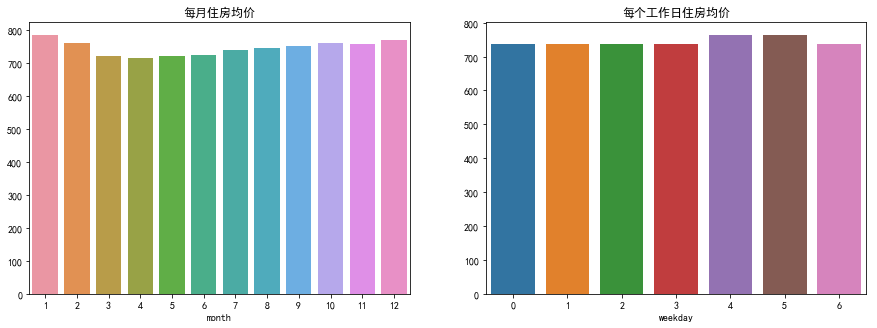

In [153]:
plt.rcParams['font.sans-serif'] = ['SimHei']

fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax1 = sns.barplot(month_price.index, month_price.values, ax=axes[0])
ax1.set_title("每月住房均价")
ax2 = sns.barplot(weekday_price.index, weekday_price.values, ax=axes[1])
ax2.set_title("每个工作日住房均价")

In [82]:
(calendar['price']<2000).loc[0:10]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
Name: price, dtype: bool

In [77]:
calendar[calendar['price']<2000].loc[0:10]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,month
0,1610503,2020-03-17,f,505.0,505.0,1,1125,1,3
1,782604,2020-03-17,f,737.0,737.0,27,365,1,3
2,782604,2020-03-18,f,737.0,737.0,27,365,2,3
3,782604,2020-03-19,f,737.0,737.0,27,365,3,3
4,782604,2020-03-20,f,737.0,737.0,27,365,4,3
5,782604,2020-03-21,f,737.0,737.0,27,365,5,3
6,782604,2020-03-22,f,737.0,737.0,27,365,6,3
7,782604,2020-03-23,f,737.0,737.0,27,365,0,3
8,782604,2020-03-24,f,737.0,737.0,27,365,1,3
9,782604,2020-03-25,f,737.0,737.0,27,365,2,3


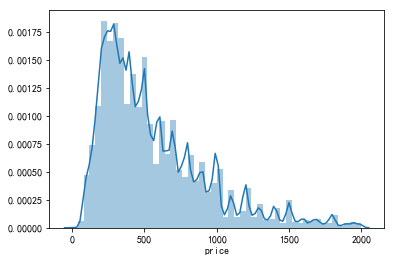

In [68]:
sns.distplot(calendar[calendar['price']<2000]['price'])

# 2、listings data analysis

In [84]:
path2 = os.path.join(base_path, 'data', 'listings_detailed.csv')
listings_detailed = pd.read_csv(path2)

/Users/msq/Virtualenv_python/interview-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
listings_detailed.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20200317143859,2020-03-17,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.20
1,103760,https://www.airbnb.com/rooms/103760,20200317143859,2020-03-17,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",You really can't ask for a better location. I...,"Located right in the heart of Central, this 2 ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.53
2,132773,https://www.airbnb.com/rooms/132773,20200317143859,2020-03-17,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",This is a large 2 Bedroom apartment that is ne...,"Nicely decorated, spacious 2 bedroom apartment...",none,The Sheung Wan neighbourhood is ever changing ...,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.87
3,133390,https://www.airbnb.com/rooms/133390,20200317143859,2020-03-17,"Soho, Hong Kong 1 bedroom flat",My cozy one bedroom apartment is located in th...,My one-bedroom apartment (about 500 sq. feet) ...,My cozy one bedroom apartment is located in th...,none,Soho in Central is right in the middle of all ...,...,f,f,moderate,f,f,1,1,0,0,0.25
4,163664,https://www.airbnb.com/rooms/163664,20200317143859,2020-03-17,Soho off Hollywood Road P4,"Fun Fact: Possession St, is where the British ...",Located in the most convenient spot in Hong Ko...,"Fun Fact: Possession St, is where the British ...",none,Fantastic traditional Hong Kong neighborhood w...,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.12


In [91]:
listings_detailed.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [93]:
listings_detailed[['cleaning_fee', 'price']].head()

,cleaning_fee,price
0,$311.00,"$1,398.00"
1,$303.00,$847.00
2,$303.00,"$1,048.00"
3,NaN,$932.00
4,$303.00,$691.00


In [94]:
listings_detailed['price'] = listings_detailed['price'].str.replace(r"[$,]", "", regex=True).astype("float32")
listings_detailed['cleaning_fee'] = listings_detailed['cleaning_fee'].str.replace(r"[$,]", "", regex=True).astype("float32")

In [95]:
listings_detailed[['cleaning_fee', 'price']].head()

,cleaning_fee,price
0,311.0,1398.0
1,303.0,847.0
2,303.0,1048.0
3,NaN,932.0
4,303.0,691.0


In [97]:
listings_detailed['cleaning_fee'].fillna(0, inplace=True)
listings_detailed['cleaning_fee'].head()

0    311.0
1    303.0
2    303.0
3      0.0
4    303.0
Name: cleaning_fee, dtype: float32

In [99]:
listings_detailed['minimum_nights'].head()

0    3
1    2
2    2
3    2
4    2
Name: minimum_nights, dtype: int64

In [98]:
listings_detailed['minimum_cost'] = (listings_detailed['price']+listings_detailed['cleaning_fee'])*listings_detailed['minimum_nights']
listings_detailed['minimum_cost'].head()

0    5127.0
1    2300.0
2    2702.0
3    1864.0
4    1988.0
Name: minimum_cost, dtype: float64

In [100]:
listings_detailed['amenities'].head()

0    {"Cable TV",Internet,Wifi,"Air conditioning",K...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
3    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

In [102]:
listings_detailed['n_amenities'] = listings_detailed['amenities'].str[1:-1].str.split(',').apply(len)
listings_detailed['n_amenities'].head()

0    33
1    11
2    13
3    11
4    18
Name: n_amenities, dtype: int64

In [103]:
listings_detailed['accommodates'].head()

0    3
1    6
2    6
3    2
4    6
Name: accommodates, dtype: int64

In [106]:
# 根据可容纳的人数，添加一个新的列，用来表示类型：Single(1)、Couple(2)、Family(5)、Group(100)
listings_detailed['accommodates_type'] = pd.cut(listings_detailed['accommodates'], bins=[1,2,3,6,100], include_lowest=True, right=False,
                                               labels=['Single', 'Couple', 'Family', 'Group'])
listings_detailed['accommodates_type'].loc[0:10]

0     Family
1      Group
2      Group
3     Couple
4      Group
5      Group
6     Couple
7     Couple
8      Group
9     Family
10    Family
Name: accommodates_type, dtype: category
Categories (4, object): [Single < Couple < Family < Group]

In [108]:
listings_detailed['neighbourhood_cleansed'].head()

0    Central & Western
1    Central & Western
2    Central & Western
3    Central & Western
4    Central & Western
Name: neighbourhood_cleansed, dtype: object

In [109]:
listings_detailed['review_scores_rating'].head()

0    97.0
1    89.0
2    93.0
3    97.0
4    86.0
Name: review_scores_rating, dtype: float64

In [128]:
listings_detailed_df = listings_detailed[['id','host_id','listing_url','room_type',
                                          'neighbourhood_cleansed','price','cleaning_fee','amenities','n_amenities',
                                         'accommodates','accommodates_type','minimum_nights','minimum_cost']]
listings_detailed_df.head()

,id,host_id,listing_url,room_type,neighbourhood_cleansed,price,cleaning_fee,amenities,n_amenities,accommodates,accommodates_type,minimum_nights,minimum_cost
0,69074,160139,https://www.airbnb.com/rooms/69074,Entire home/apt,Central & Western,1398.0,311.0,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",33,3,Family,3,5127.0
1,103760,304876,https://www.airbnb.com/rooms/103760,Entire home/apt,Central & Western,847.0,303.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11,6,Group,2,2300.0
2,132773,304876,https://www.airbnb.com/rooms/132773,Entire home/apt,Central & Western,1048.0,303.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",13,6,Group,2,2702.0
3,133390,654642,https://www.airbnb.com/rooms/133390,Entire home/apt,Central & Western,932.0,0.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11,2,Couple,2,1864.0
4,163664,304876,https://www.airbnb.com/rooms/163664,Entire home/apt,Central & Western,691.0,303.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,6,Group,2,1988.0


In [129]:
listings_detailed_df['room_type']

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
11768    Entire home/apt
11769       Private room
11770       Private room
11771    Entire home/apt
11772    Entire home/apt
Name: room_type, Length: 11773, dtype: object

<class 'matplotlib.axes._subplots.AxesSubplot'>


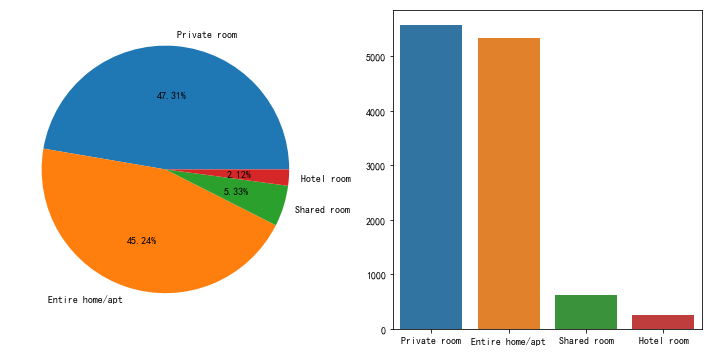

In [130]:
# 房间类型的情况
room_type_counts = listings_detailed_df['room_type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
print(type(axes[0]))
axes[0].pie(room_type_counts.values, autopct="%.2f%%", labels=room_type_counts.index)
sns.barplot(room_type_counts.index, room_type_counts.values, ax=axes[1])
plt.tight_layout()

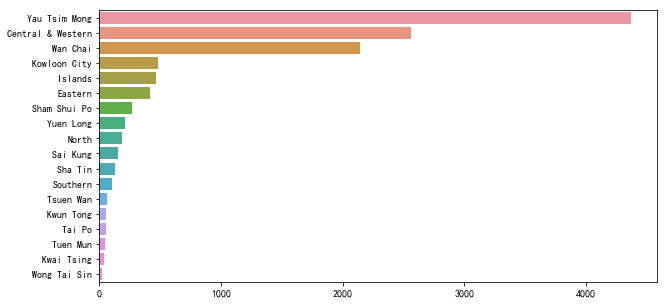

In [134]:
plt.figure(figsize=(10, 5))
neighbourhood_counts = listings_detailed_df['neighbourhood_cleansed'].value_counts()
sns.barplot(y=neighbourhood_counts.index, x=neighbourhood_counts.values, orient='h')
# plt.tight_layout()

In [150]:
neighbour_room_type = listings_detailed_df.groupby(['neighbourhood_cleansed', 'room_type']) \
    .size() \
    .unstack('room_type') \
    .fillna(0) \
    .apply(lambda row:row/sum(row), axis=1) \
    .sort_values('Entire home/apt', ascending=True)
neighbour_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
Tai Po,0.272727,0.000000,0.709091,0.018182
Yau Tsim Mong,0.282609,0.047826,0.612815,0.056751
Sha Tin,0.312500,0.000000,0.507812,0.179688
Sai Kung,0.331126,0.000000,0.635762,0.033113
Sham Shui Po,0.352060,0.003745,0.558052,0.086142
Kowloon City,0.375519,0.006224,0.545643,0.072614
Kwun Tong,0.413793,0.000000,0.482759,0.103448
Tuen Mun,0.425532,0.000000,0.446809,0.127660
Eastern,0.466507,0.000000,0.473684,0.059809


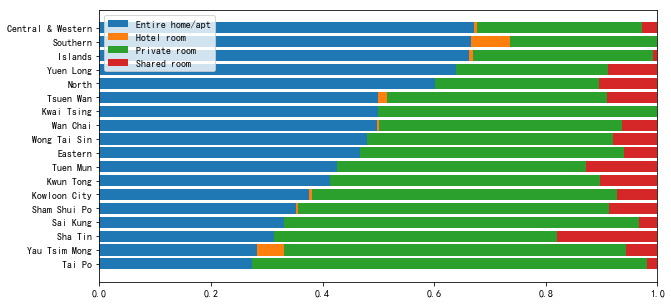

In [154]:
columns = neighbour_room_type.columns
plt.figure(figsize=(10,5))
index = neighbour_room_type.index
plt.barh(index,neighbour_room_type[columns[0]])
left = neighbour_room_type[columns[0]].copy()
plt.barh(index,neighbour_room_type[columns[1]],left=left)
left += neighbour_room_type[columns[1]].copy()
plt.barh(index,neighbour_room_type[columns[2]],left=left)
left += neighbour_room_type[columns[2]].copy()
plt.barh(index,neighbour_room_type[columns[3]],left=left)
plt.legend(columns)

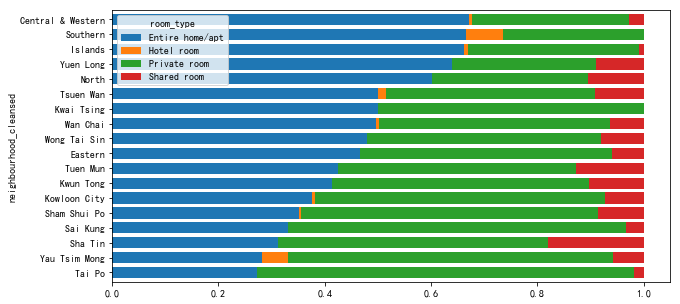

In [156]:
fig,ax = plt.subplots(figsize=(10,5))
# neighbour_room_type.plot(kind="barh", stacked=True)

neighbour_room_type.plot(kind="barh",stacked=True,width=0.75,ax=ax)

1      3979
2       530
3-5     385
6+      297
Name: host_id, dtype: int64

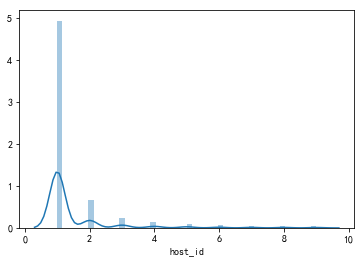

In [188]:
temp = listings_detailed_df['host_id'].value_counts()
sns.distplot(temp[temp<10])
host_id_number1 = pd.cut(temp, bins=[1,2,3,6,1000], right=False, include_lowest=True, labels=['1', '2', '3-5', '6+'])
host_id_number1.value_counts()

In [189]:
host_id_number = listings_detailed_df.groupby('host_id').size()
host_id_number = pd.cut(host_id_number, bins=[1,2,3,6,1000], right=False, include_lowest=True, labels=['1', '2', '3-5', '6+']).value_counts()
host_id_number

1      3979
2       530
3-5     385
6+      297
dtype: int64

([<matplotlib.patches.Wedge at 0x12e82d048>,
 [Text(-0.8171176485421673, 0.7364229412782571, '1'),
  Text(0.453099424864613, -1.0023476997466285, '2'),
  Text(0.9125075300861337, -0.6142719328897456, '3-5'),
  Text(1.0822783414722243, -0.19665602350330225, '6+')],
 [Text(-0.44570053556845485, 0.4016852406972311, '76.65%'),
  Text(0.24714514083524344, -0.5467351089527064, '10.21%'),
  Text(0.4977313800469819, -0.33505741793986116, '7.42%'),
  Text(0.5903336408030314, -0.10726692191089213, '5.72%')])

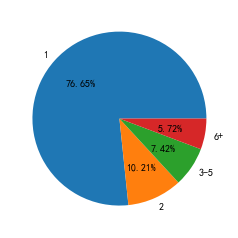

In [190]:
plt.pie(host_id_number, autopct="%.2f%%", labels=host_id_number.index)

# 3、Reviews data analysis

In [193]:
p3 = os.path.join(base_path, 'data/reviews_detailed.csv')
reviews = pd.read_csv(p3)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


In [194]:
reviews['date'].head()

0    2011-02-14
1    2011-05-05
2    2011-07-27
3    2011-08-01
4    2011-09-03
Name: date, dtype: object

In [195]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['date'].head()

0   2011-02-14
1   2011-05-05
2   2011-07-27
3   2011-08-01
4   2011-09-03
Name: date, dtype: datetime64[ns]

In [197]:
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

In [199]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...,2011,2
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy...",2011,5
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...,2011,7
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he...",2011,8
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...,2011,9


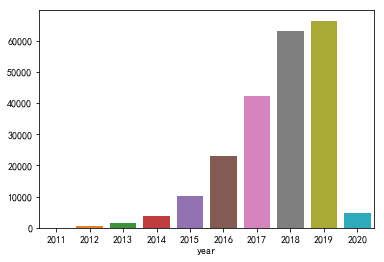

In [203]:
n_reviews_year = reviews.groupby('year').size()
sns.barplot(n_reviews_year.index, n_reviews_year.values)

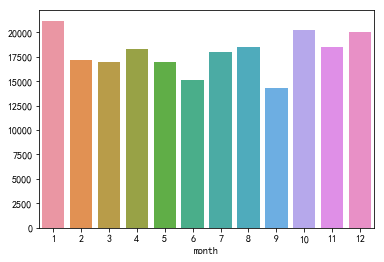

In [204]:
n_reviews_month = reviews.groupby("month").size()
sns.barplot(n_reviews_month.index,n_reviews_month.values)

In [217]:
year_month_reviews = reviews.groupby(['year', 'month']).size().unstack('month').fillna(0)
year_month_reviews

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,0.0,1.0,0.0,0.0,1.0,1.0,8.0,13.0,14.0,14.0,14.0,23.0
2012,17.0,12.0,14.0,24.0,15.0,28.0,28.0,53.0,42.0,84.0,84.0,89.0
2013,99.0,70.0,92.0,108.0,110.0,74.0,101.0,134.0,136.0,186.0,179.0,221.0
2014,221.0,173.0,244.0,261.0,219.0,225.0,312.0,420.0,375.0,525.0,434.0,510.0
2015,589.0,571.0,565.0,598.0,600.0,608.0,723.0,876.0,959.0,1294.0,1213.0,1486.0
2016,1746.0,1428.0,1281.0,1497.0,1504.0,1361.0,1695.0,2003.0,1919.0,2765.0,2506.0,3173.0
2017,3301.0,2655.0,2810.0,3299.0,3058.0,2478.0,3642.0,4349.0,3165.0,4787.0,4030.0,4548.0
2018,4615.0,3950.0,4130.0,5095.0,4197.0,4296.0,5290.0,6350.0,4700.0,6680.0,6787.0,6931.0
2019,7469.0,7002.0,7511.0,7405.0,7284.0,6011.0,6146.0,4282.0,2988.0,3939.0,3291.0,3074.0


In [218]:
year_month_reviews.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [220]:
series = year_month_reviews.loc[2011]
series

month
1      0.0
2      1.0
3      0.0
4      0.0
5      1.0
6      1.0
7      8.0
8     13.0
9     14.0
10    14.0
11    14.0
12    23.0
Name: 2011, dtype: float64

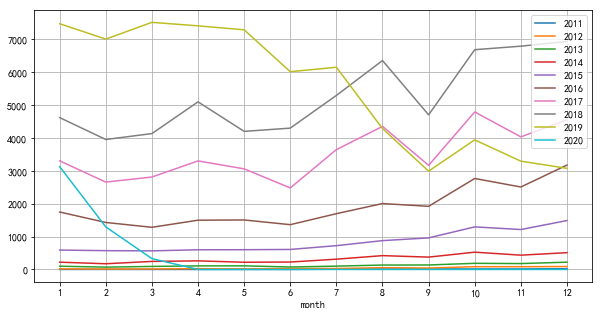

In [221]:
fig,ax = plt.subplots(figsize=(10,5))
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index]
    sns.lineplot(x=series.index,y=series.values,ax=ax)
ax.legend(labels=year_month_reviews.index)
ax.grid()
_ = ax.set_xticks(list(range(1,13)))

# 4、Predict house prices

In [223]:
'host_is_superhost',
'host_identity_verified',
'neighbourhood_group_cleansed',
'latitude',
'longitude',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'cleaning_fee',
'minimum_nights',
'maximum_nights',
'availability_90',
'number_of_reviews',
'review_scores_rating',
'is_business_travel_ready',
'n_amenities',
'price'

'price'

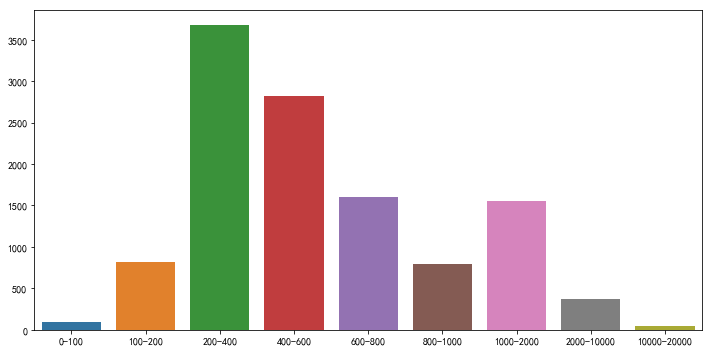

In [235]:
plt.figure(figsize=(10,5))
price_range_df = pd.cut(listings_detailed['price'], bins=[0,100,200,400,600,800,1000,2000,10000,20000], labels=['0-100', '100-200', '200-400', '400-600', '600-800', '800-1000', '1000-2000', '2000-10000', '10000-20000']).value_counts()
sns.barplot(price_range_df.index, price_range_df.values)
plt.tight_layout()

In [237]:
from sklearn.preprocessing import StandardScaler
ml_listings = listings_detailed[listings_detailed['price']<300][[
    'host_is_superhost',
    'host_identity_verified',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'cleaning_fee',
    'minimum_nights',
    'maximum_nights',
    'availability_90',
    'number_of_reviews',
#     'review_scores_rating',
    'is_business_travel_ready',
    'n_amenities',
    'price'
]]
ml_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 36 to 11766
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   host_is_superhost         2897 non-null   object 
 1   host_identity_verified    2897 non-null   object 
 2   neighbourhood_cleansed    2897 non-null   object 
 3   latitude                  2897 non-null   float64
 4   longitude                 2897 non-null   float64
 5   property_type             2897 non-null   object 
 6   room_type                 2897 non-null   object 
 7   accommodates              2897 non-null   int64  
 8   bathrooms                 2887 non-null   float64
 9   bedrooms                  2891 non-null   float64
 10  cleaning_fee              2897 non-null   float32
 11  minimum_nights            2897 non-null   int64  
 12  maximum_nights            2897 non-null   int64  
 13  availability_90           2897 non-null   int64  
 14  number

In [241]:
# 删除异常值
ml_listings.dropna(axis=0, inplace=True)
ml_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 36 to 11755
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   host_is_superhost         2882 non-null   object 
 1   host_identity_verified    2882 non-null   object 
 2   neighbourhood_cleansed    2882 non-null   object 
 3   latitude                  2882 non-null   float64
 4   longitude                 2882 non-null   float64
 5   property_type             2882 non-null   object 
 6   room_type                 2882 non-null   object 
 7   accommodates              2882 non-null   int64  
 8   bathrooms                 2882 non-null   float64
 9   bedrooms                  2882 non-null   float64
 10  cleaning_fee              2882 non-null   float32
 11  minimum_nights            2882 non-null   int64  
 12  maximum_nights            2882 non-null   int64  
 13  availability_90           2882 non-null   int64  
 14  number

In [244]:
# 分割特征值和目标值
features = ml_listings.drop(columns='price')
targets = ml_listings['price']

In [245]:
features

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,availability_90,number_of_reviews,is_business_travel_ready,n_amenities
36,t,f,Kowloon City,22.31360,114.18918,Apartment,Private room,1,1.0,1.0,0.0,2,30,89,232,f,17
37,f,f,Wan Chai,22.27825,114.17699,Apartment,Shared room,8,3.0,1.0,0.0,1,1125,90,113,f,30
38,f,f,Wan Chai,22.27825,114.17699,Apartment,Shared room,8,2.0,1.0,0.0,1,1125,84,225,f,30
39,f,f,Wan Chai,22.27825,114.17699,Apartment,Shared room,8,3.0,1.0,0.0,1,1125,90,45,f,30
40,f,f,Wan Chai,22.27825,114.17699,Apartment,Shared room,8,2.0,1.0,0.0,1,1125,90,25,f,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11735,f,f,Sha Tin,22.38224,114.19149,Apartment,Shared room,1,1.0,1.0,0.0,110,120,79,0,f,3
11737,f,f,Yau Tsim Mong,22.29684,114.17538,Hostel,Private room,1,1.0,1.0,0.0,30,1125,90,0,f,13
11738,f,f,Yau Tsim Mong,22.29693,114.17591,Hostel,Private room,2,1.0,1.0,0.0,30,1125,90,0,f,14
11752,f,t,Yau Tsim Mong,22.29765,114.17265,Bed and breakfast,Private room,2,1.0,1.0,0.0,1,1125,90,0,f,12


In [246]:
# 针对离散型进行one-hot编码
disperse_columns = [
    'host_is_superhost',
    'host_identity_verified',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'is_business_travel_ready'
]
disperse_features = features[disperse_columns]
disperse_features = pd.get_dummies(disperse_features)

In [253]:
disperse_features

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Central & Western,neighbourhood_cleansed_Eastern,neighbourhood_cleansed_Islands,neighbourhood_cleansed_Kowloon City,neighbourhood_cleansed_Kwai Tsing,neighbourhood_cleansed_Kwun Tong,...,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_business_travel_ready_f
36,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
37,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
38,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
39,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
40,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11735,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
11737,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
11738,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
11752,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [248]:
from sklearn.preprocessing import StandardScaler

continuouse_features = features.drop(columns=disperse_columns)
scaler = StandardScaler()
continuouse_features = scaler.fit_transform(continuouse_features)
continuouse_features

array([[ 0.12986924,  0.67079209, -0.50825237, ...,  0.51072591,
         7.14673736,  0.76931767],
       [-0.59249969,  0.27021133,  3.42179104, ...,  0.54094439,
         3.29317597,  2.66408862],
       [-0.59249969,  0.27021133,  3.42179104, ...,  0.3596335 ,
         6.92005728,  2.66408862],
       ...,
       [-0.21077829,  0.23472099,  0.05318241, ...,  0.54094439,
        -0.36608822,  0.33206283],
       [-0.19606526,  0.12759275,  0.05318241, ...,  0.54094439,
        -0.36608822,  0.04055961],
       [-0.60721272,  2.00562315,  0.05318241, ...,  0.51072591,
        -0.36608822, -0.39669523]])

In [252]:
# 对处理后的特征进行组合
feature_array = np.hstack([disperse_features.to_numpy() ,continuouse_features])
feature_array

array([[ 0.        ,  1.        ,  1.        , ...,  0.51072591,
         7.14673736,  0.76931767],
       [ 1.        ,  0.        ,  1.        , ...,  0.54094439,
         3.29317597,  2.66408862],
       [ 1.        ,  0.        ,  1.        , ...,  0.3596335 ,
         6.92005728,  2.66408862],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.54094439,
        -0.36608822,  0.33206283],
       [ 1.        ,  0.        ,  0.        , ...,  0.54094439,
        -0.36608822,  0.04055961],
       [ 1.        ,  0.        ,  1.        , ...,  0.51072591,
        -0.36608822, -0.39669523]])

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(feature_array, targets, test_size=0.25)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [259]:
y_predict = regressor.predict(X_test)
print("平均误差：",mean_absolute_error(y_test,y_predict))
print("R2评分：",r2_score(y_test,y_predict))

平均误差： 35.43015256588072
R2评分： 0.263435618625661


In [261]:
print(X_test)

[[ 1.          0.          0.         ... -2.17871906 -0.33370535
   0.04055961]
 [ 1.          0.          1.         ...  0.54094439 -0.00987666
   2.3725854 ]
 [ 1.          0.          1.         ...  0.54094439 -0.36608822
  -1.12545329]
 ...
 [ 1.          0.          0.         ... -2.17871906 -0.36608822
  -0.97970167]
 [ 1.          0.          1.         ...  0.51072591 -0.36608822
  -0.54244684]
 [ 1.          0.          1.         ...  0.51072591 -0.36608822
  -1.12545329]]
